## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results, how = 'outer')
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [3]:
# # regimen_df = combined_df.set_index(["Drug Regimen"])
# # regimen_df

# tumor_groupby_median = regimen_groupby_df["Tumor Volume (mm3)"].median()
# tumor_groupby_median_df = pd.DataFrame({"Tumor Volume (mm3) Median":tumor_groupby_median})

# tumor_groupby_variance = regimen_groupby_df["Tumor Volume (mm3)"].var()
# tumor_groupby_variance_df = pd.DataFrame({"Tumor Volume (mm3) Variance":tumor_groupby_variance})

# describe_df["Tumor Volume (mm3) Median"] = tumor_groupby_median_df
# describe_df["Tumor Volume (mm3) Variance"] = tumor_groupby_variance_df
# describe_df


In [4]:


test_df = combined_df.drop(["Sex","Age_months", "Metastatic Sites","Weight (g)","Timepoint"],axis = 1)


regimen_groupby_df = test_df.groupby(["Drug Regimen"])
mean_df = regimen_groupby_df.mean()


tumor_groupby_median = regimen_groupby_df["Tumor Volume (mm3)"].median()
tumor_groupby_median_df = pd.DataFrame({"Tumor Volume (mm3) Median":tumor_groupby_median})

tumor_groupby_variance = regimen_groupby_df["Tumor Volume (mm3)"].var()
tumor_groupby_variance_df = pd.DataFrame({"Tumor Volume (mm3) Variance":tumor_groupby_variance})

tumor_groupby_stdev = regimen_groupby_df["Tumor Volume (mm3)"].std()
tumor_groupby_stdev_df = pd.DataFrame({"Tumor Volume (mm3) Standard Deviation":tumor_groupby_stdev})

tumor_groupby_sem = regimen_groupby_df["Tumor Volume (mm3)"].sem()
tumor_groupby_sem_df = pd.DataFrame({"Tumor Volume (mm3) Standard Error":tumor_groupby_sem})


mean_df["Tumor Volume (mm3) Median"] = tumor_groupby_median_df
mean_df["Tumor Volume (mm3) Variance"] = tumor_groupby_variance_df
mean_df["Tumor Volume (mm3) Standard Deviation"] = tumor_groupby_stdev_df
mean_df["Tumor Volume (mm3) Standard Error"] = tumor_groupby_sem_df

mean_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume (mm3) Mean"},inplace = True)

mean_df

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0.5, 1.0, 'Tests Conducted per Drug Regimen')

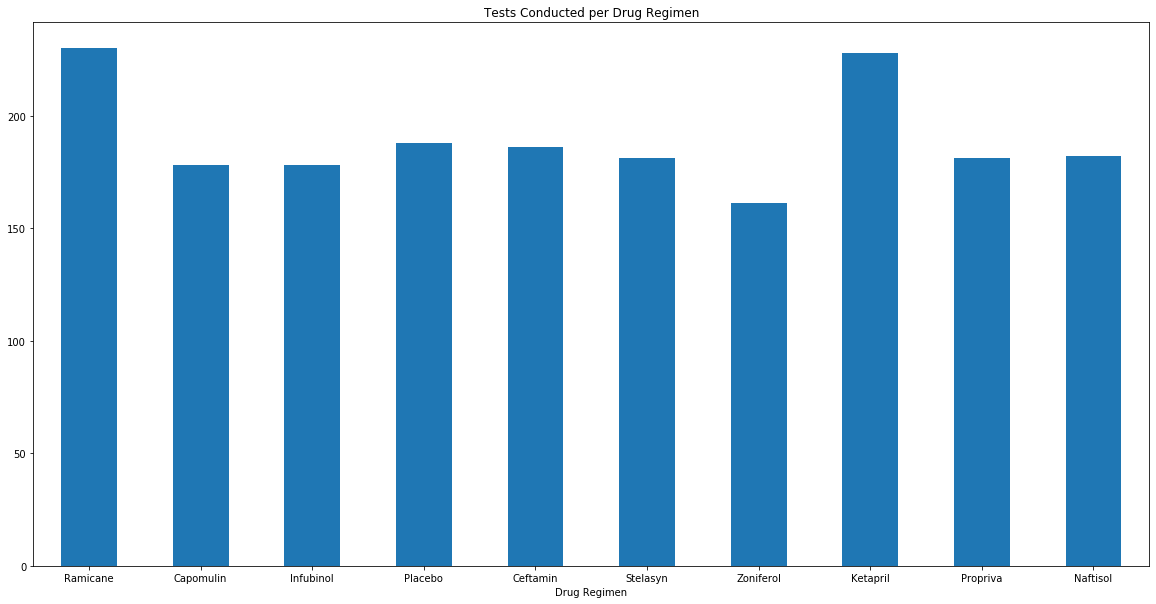

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas


regimen_groupby_df = combined_df.groupby(["Drug Regimen"])
describe_df = regimen_groupby_df["Tumor Volume (mm3)"].describe()

# Pandas can also plot multiple columns if the DataFrame includes them
drug_regimen_df_plot = describe_df["count"].plot(kind="bar", figsize=(20,10))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
drug_regimen_df_plot.set_xticklabels(combined_df["Drug Regimen"].unique(), rotation=0)
plt.title("Tests Conducted per Drug Regimen")

Text(0.5, 1.0, 'Tests Conducted per Drug Regimen')

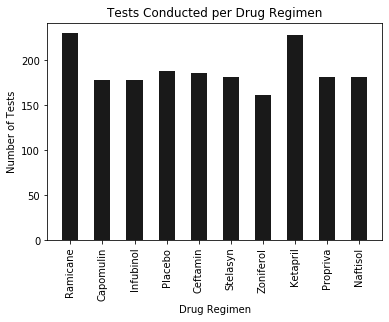

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Might have to use numpy to conduct math expressions on data set


#describe_df["count"] will grab the number of data points for each treatment regimen
plt.bar(combined_df["Drug Regimen"].unique(), describe_df["count"], width = 0.5, color='black', alpha = 0.9, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Tests")
plt.xticks(combined_df["Drug Regimen"].unique(),rotation = "vertical")
plt.title("Tests Conducted per Drug Regimen")


## Pie plots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000181679A1888>],
      dtype=object)

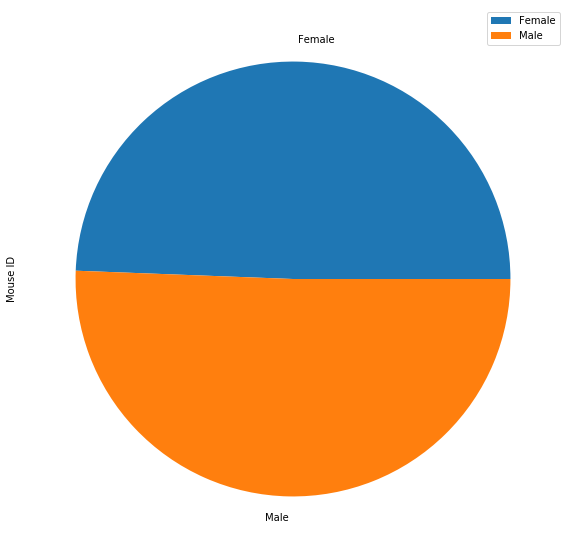

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_df = combined_df.drop(columns =["Age_months", "Metastatic Sites","Weight (g)","Timepoint","Drug Regimen","Tumor Volume (mm3)"])
# mice_gender_df
gender_groupby_df = mice_gender_df.groupby(["Sex"])
gender_groupby_df_2 = gender_groupby_df.count()
gender_groupby_df_2.plot(kind = 'pie', label = ["Sex"],figsize=(20,10), subplots = True )

## Quartiles, outliers and boxplots

([<matplotlib.patches.Wedge at 0x18167b7ac08>,
 [Text(-1.0997996703027118, -0.020992503472585362, 'Male'),
  Text(1.0997996703027118, 0.020992503472585713, 'Female')],
 [Text(-0.5998907292560246, -0.011450456439592015, '50.6%'),
  Text(0.5998907292560246, 0.011450456439592206, '49.4%')])

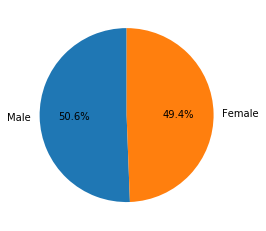

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(combined_df["Sex"].value_counts(), labels = combined_df["Sex"].unique(),autopct="%1.1f%%",startangle = 90)


In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [10]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [11]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [12]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [13]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen